### Importar librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import calendar
import datetime
import fbprophet

Importing plotly failed. Interactive plots will not work.


### Cargar el dataset y visualizarlo 

In [2]:
# Nombre de los documentos que están en el mismo nivel
os.listdir()

['.ipynb_checkpoints',
 'diccionario_ingresos_metro.xlsx',
 'informacion-ingresos-cierre-2012_06-2021-ok.csv',
 'Metro.ipynb']

In [3]:
# Leer el dataset
df = pd.read_csv("informacion-ingresos-cierre-2012_06-2021-ok.csv")

In [4]:
# Visualizar las primeras y ultimas 5 filas del df
df.head(5)

,FECHA,TIPO_INGRESO,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12,Unnamed: 14
0,01/01/2012,Boletos,648825.0,657120.0,466803.0,60120.0,242280.0,138525.0,138690.0,328383.0,176400.0,275370.0,472665.0,0.0,NaN
1,02/01/2012,Boletos,1532940.0,1491780.0,1168590.0,165690.0,437025.0,286620.0,433323.0,777951.0,504600.0,514455.0,965385.0,0.0,NaN
2,03/01/2012,Boletos,1398639.0,1482255.0,1143675.0,162360.0,388575.0,268770.0,432117.0,758661.0,503595.0,489090.0,887790.0,0.0,NaN
3,04/01/2012,Boletos,1414041.0,1556265.0,1181085.0,171360.0,392190.0,270795.0,443070.0,799875.0,505575.0,521760.0,964290.0,0.0,NaN
4,05/01/2012,Boletos,1407075.0,1593750.0,1200975.0,178830.0,384465.0,269055.0,447345.0,823911.0,515835.0,509055.0,988845.0,0.0,NaN


In [5]:
df.tail(5)

,FECHA,TIPO_INGRESO,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12,Unnamed: 14
10342,26/06/2021,Tarjetas,5535.0,7980.0,3840.0,645.0,1140.0,675.0,2325.0,3030.0,1860.0,855.0,2220.0,0.0,NaN
10343,27/06/2021,Tarjetas,3480.0,4560.0,2190.0,240.0,750.0,405.0,960.0,1725.0,840.0,510.0,1035.0,0.0,NaN
10344,28/06/2021,Tarjetas,6075.0,7725.0,4830.0,360.0,1560.0,735.0,2625.0,4275.0,1935.0,1365.0,2175.0,0.0,NaN
10345,29/06/2021,Tarjetas,4470.0,6570.0,4380.0,480.0,1275.0,750.0,2175.0,3195.0,1620.0,915.0,1575.0,0.0,NaN
10346,30/06/2021,Tarjetas,5460.0,6525.0,4815.0,525.0,1245.0,570.0,2325.0,3450.0,1320.0,930.0,1920.0,0.0,NaN


In [6]:
# Vemos la información resumida de cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10347 entries, 0 to 10346
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FECHA         10347 non-null  object 
 1   TIPO_INGRESO  10347 non-null  object 
 2   LINEA_1       10347 non-null  float64
 3   LINEA_2       10347 non-null  float64
 4   LINEA_3       10347 non-null  float64
 5   LINEA_4       10347 non-null  float64
 6   LINEA_5       10347 non-null  float64
 7   LINEA_6       10347 non-null  float64
 8   LINEA_7       10347 non-null  float64
 9   LINEA_8       10347 non-null  float64
 10  LINEA_9       10347 non-null  float64
 11  LINEA_A       10347 non-null  float64
 12  LINEA_B       10347 non-null  float64
 13  LINEA_12      10347 non-null  float64
 14  Unnamed: 14   0 non-null      float64
dtypes: float64(13), object(2)
memory usage: 1.2+ MB


In [7]:
# No hay ningun dato faltante, la columna 14 está vacía por lo que se eliminará
df.drop('Unnamed: 14', axis = 1, inplace = True)

In [8]:
# En caso de que haya duplicas las borramos
df.drop_duplicates(inplace = True)

In [9]:
# Establecer FECHA como datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

In [10]:
# Separamos la fecha por año, mes y día para el apoyo de visualización que se hará posteriormente
df['AÑO'] = df['FECHA'].apply(lambda fecha: fecha.year)
df['MES'] = df['FECHA'].apply(lambda fecha: fecha.month)
df['DIA'] = df['FECHA'].apply(lambda fecha: fecha.day)

### Descripción breve del dataframe

In [11]:
# Vemos la descripción del df
df.describe()

,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12,AÑO,MES,DIA
count,1.034700e+04,1.034700e+04,1.034700e+04,1.034700e+04,1.034700e+04,1.034700e+04,1.034700e+04,1.034700e+04,1.034700e+04,1.034700e+04,1.034700e+04,1.034700e+04,10347.00000,10347.000000,10347.000000
mean,7.830741e+05,8.863912e+05,7.446197e+05,1.081342e+05,2.415946e+05,1.667929e+05,3.676263e+05,4.505052e+05,3.289825e+05,2.536214e+05,5.148797e+05,3.660466e+05,2016.28559,6.445636,15.677298
std,6.848030e+05,7.651484e+05,6.566904e+05,9.807193e+04,2.205056e+05,1.563351e+05,3.439616e+05,3.932806e+05,2.892408e+05,2.339015e+05,4.616623e+05,6.302657e+05,2.73812,3.439350,8.848814
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2012.00000,1.000000,1.000000
25%,6.222500e+03,8.735000e+03,5.790000e+03,8.400000e+02,1.780000e+03,1.220000e+03,3.580000e+03,3.210000e+03,2.600000e+03,1.170000e+03,3.320000e+03,0.000000e+00,2014.00000,3.000000,8.000000
50%,7.744105e+05,9.352000e+05,7.403443e+05,9.838300e+04,2.181160e+05,1.521410e+05,3.400400e+05,4.587500e+05,3.275790e+05,2.474563e+05,5.021670e+05,2.237000e+04,2016.00000,6.000000,16.000000
75%,1.354238e+06,1.586947e+06,1.351540e+06,1.888835e+05,4.064625e+05,3.033765e+05,6.600875e+05,7.886206e+05,5.923572e+05,4.390500e+05,8.878280e+05,5.746080e+05,2019.00000,9.000000,23.000000
max,7.619910e+06,8.337195e+06,7.268655e+06,1.747095e+06,2.562030e+06,1.973325e+06,3.551025e+06,5.360265e+06,3.474285e+06,2.709630e+06,5.693535e+06,2.836075e+06,2021.00000,12.000000,31.000000


In [12]:
df.groupby(['TIPO_INGRESO']).mean()

,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12,AÑO,MES,DIA
TIPO_INGRESO,,,,,,,,,,,,,,,
Boletos,1.392323e+06,1.387187e+06,1.144638e+06,185975.275295,452447.719804,268787.505045,494447.757279,751809.315365,522497.621793,502533.545690,933727.225425,0.000000e+00,2016.260882,6.426924,15.663592
Recargas,9.466296e+05,1.260439e+06,1.080996e+06,136964.501115,268997.920574,229614.318569,604310.564921,594409.739105,460784.076643,255165.398667,604541.103064,1.072014e+06,2016.298052,6.455074,15.684211
Tarjetas,4.955093e+03,7.179117e+03,4.735739e+03,783.799069,1498.815063,1087.209945,3014.220704,2668.242222,1977.765339,993.752544,2717.025298,2.931893e+04,2016.298052,6.455074,15.684211


In [13]:
df.groupby(['TIPO_INGRESO']).mean().sum()

LINEA_1     2.343908e+06
LINEA_2     2.654805e+06
LINEA_3     2.230370e+06
LINEA_4     3.237236e+05
LINEA_5     7.229445e+05
LINEA_6     4.994890e+05
LINEA_7     1.101773e+06
LINEA_8     1.348887e+06
LINEA_9     9.852595e+05
LINEA_A     7.586927e+05
LINEA_B     1.540985e+06
LINEA_12    1.101333e+06
AÑO         6.048857e+03
MES         1.933707e+01
DIA         4.703201e+01
dtype: float64

In [14]:
df[(df['LINEA_12'] != 0) & (df['TIPO_INGRESO'] == 'Boletos')]

,FECHA,TIPO_INGRESO,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12,AÑO,MES,DIA


- La línea con un promedio mayor de ingresos es la linea 2 (Azul) y la de menor ingresos es la linea 4 (azul clarito)
- La línea 7 (naranja) es la única que recibe mayor cantidad de ingresos por recargas que por compra de boletos
- La línea 12 (dorada) no tiene registrado ingresos por boletos

### ¿Que día de la semana existe un mayor ingresos en el metro?

In [15]:
# Agregamos una columna que indique el día de la semana

# FUNCIÓN LARGA

# Función que ayudará a encontrar el día de la semana a partir de la fecha
def dia_de_semana(fecha):
    # Separamos el formato de fecha por año, mes y día
    dia, mes, año = fecha.split('/')
    # Agregamos los datos a la función weekday que devolverá un número entre 0 y 6 (lun → 0, domingo → 6)
    dia_semana = calendar.weekday(int(año), int(mes), int(dia))
    return dia_semana

# FUNCIÓN CORTA, APROVECHAMOS LAS FUNCIONES DE LAS FECHAS Y EXTRAEMOS EL DÍA

df['DIA_SEMANA'] = df['FECHA'].apply(lambda fecha: fecha.weekday())


In [16]:
# Y agregamos una columna en donde se sumen el total de ingresos por día por tipo de ingreso
df['TOTAL_LINEAS'] = df['LINEA_1'] + df['LINEA_2'] + df['LINEA_3'] + df['LINEA_4'] + df['LINEA_5'] + df['LINEA_6'] + df['LINEA_7'] \
              + df['LINEA_8'] + df['LINEA_9'] + df['LINEA_A'] + df['LINEA_B'] + df['LINEA_12'] 


In [17]:
# El día que más se pbtuvo ingresos totales de las lineas del metro 
df[df['TOTAL_LINEAS'] == max(df['TOTAL_LINEAS'])]

,FECHA,TIPO_INGRESO,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12,AÑO,MES,DIA,DIA_SEMANA,TOTAL_LINEAS
711,2013-12-12,Boletos,7619910.0,8337195.0,7268655.0,1747095.0,2562030.0,1973325.0,3551025.0,5360265.0,3474285.0,2709630.0,5693535.0,0.0,2013,12,12,3,50296950.0


In [18]:
df.head()

,FECHA,TIPO_INGRESO,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12,AÑO,MES,DIA,DIA_SEMANA,TOTAL_LINEAS
0,2012-01-01,Boletos,648825.0,657120.0,466803.0,60120.0,242280.0,138525.0,138690.0,328383.0,176400.0,275370.0,472665.0,0.0,2012,1,1,6,3605181.0
1,2012-02-01,Boletos,1532940.0,1491780.0,1168590.0,165690.0,437025.0,286620.0,433323.0,777951.0,504600.0,514455.0,965385.0,0.0,2012,2,1,2,8278359.0
2,2012-03-01,Boletos,1398639.0,1482255.0,1143675.0,162360.0,388575.0,268770.0,432117.0,758661.0,503595.0,489090.0,887790.0,0.0,2012,3,1,3,7915527.0
3,2012-04-01,Boletos,1414041.0,1556265.0,1181085.0,171360.0,392190.0,270795.0,443070.0,799875.0,505575.0,521760.0,964290.0,0.0,2012,4,1,6,8220306.0
4,2012-05-01,Boletos,1407075.0,1593750.0,1200975.0,178830.0,384465.0,269055.0,447345.0,823911.0,515835.0,509055.0,988845.0,0.0,2012,5,1,1,8319141.0


<AxesSubplot:xlabel='DIA_SEMANA'>

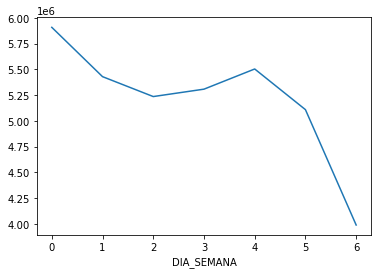

In [21]:
df.groupby('DIA_SEMANA').mean()['TOTAL_LINEAS'].plot()

In [23]:
df.groupby('DIA_SEMANA').mean()['TOTAL_LINEAS']

DIA_SEMANA
0    5.907933e+06
1    5.429304e+06
2    5.236049e+06
3    5.307853e+06
4    5.503746e+06
5    5.109148e+06
6    3.989334e+06
Name: TOTAL_LINEAS, dtype: float64

- El lunes es el día con mayor cantidad de ingresos y los domingos el día con menor ingresos

### Impacto de la pandemia

In [71]:
# El promedio de ingresos totales en el metro antes de la pandemia

# El 14 de marzo se declaró pandemia ## https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7250750/
antes = df[df['FECHA'].apply(lambda fecha: fecha < datetime.date(2020,3,14))]

# Eliminamos los ingresos nulos para no afectar el promedio
cero = list(antes[antes['TOTAL_LINEAS'] == 0].index)
antes.drop(cero, inplace = True)

In [73]:
# El 14 de marzo se declaró pandemia ## https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7250750/
despues = df[df['FECHA'].apply(lambda fecha: fecha > datetime.date(2020,3,14))]

In [74]:
def promedio_fecha(df):
    #  Fechas sin repetición 
    fechas_antes = sorted(set(df['FECHA']))

    # Lista donde se almacenarán los totales
    total = []

    for fecha in fechas_antes:
        sub_df = df.loc[df['FECHA'] == fecha]
        total.append(sum(sub_df['TOTAL_LINEAS']))

    promedio = np.mean(total)
    return promedio

In [75]:
promedio_antes = promedio_fecha(antes)
promedio_despues = promedio_fecha(despues)

In [114]:
print('*' * 120)
print('\tEl promedio de los ingresos del metro ANTES de la pandemia eran de {:.5} pesos diarios'.format(promedio_antes))
print('\tEl promedio de los ingresos del metro HASTA EL 30/07/2021 fue de {:.2} pesos diarios'.format(promedio_despues))
print('*' * 120)

************************************************************************************************************************
	El promedio de los ingresos del metro ANTES de la pandemia eran de 1.7134e+07 pesos diarios
	El promedio de los ingresos del metro HASTA EL 30/07/2021 fue de 5.8e+06 pesos diarios
************************************************************************************************************************


In [122]:
reduccion = 100 - (promedio_despues/promedio_antes)*100

print('*' * 120)
print('\t\t\tLa pandemia hizo que los ingresos del metro bajaran un {:.2f} %'.format(reduccion))
print('*' * 120)

************************************************************************************************************************
			La pandemia hizo que los ingresos del metro bajaran un 66.43 %
************************************************************************************************************************


### Días con mayor y menor ingresos

In [125]:
df[df['TOTAL_LINEAS'] == df['TOTAL_LINEAS'].max()]

,FECHA,TIPO_INGRESO,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12,AÑO,MES,DIA,DIA_SEMANA,TOTAL_LINEAS
711,2013-12-12,Boletos,7619910.0,8337195.0,7268655.0,1747095.0,2562030.0,1973325.0,3551025.0,5360265.0,3474285.0,2709630.0,5693535.0,0.0,2013,12,12,3,50296950.0


In [129]:
antes[antes['TOTAL_LINEAS'] == antes['TOTAL_LINEAS'].min()]

,FECHA,TIPO_INGRESO,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12,AÑO,MES,DIA,DIA_SEMANA,TOTAL_LINEAS
7026,2012-05-28,Tarjetas,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012,5,28,0,10.0
7031,2012-02-06,Tarjetas,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012,2,6,0,10.0
7158,2012-07-10,Tarjetas,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012,7,10,1,10.0


In [128]:
despues[despues['TOTAL_LINEAS'] == despues['TOTAL_LINEAS'].min()]

,FECHA,TIPO_INGRESO,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12,AÑO,MES,DIA,DIA_SEMANA,TOTAL_LINEAS
9930,2020-10-05,Tarjetas,1065.0,1125.0,540.0,120.0,135.0,45.0,315.0,330.0,165.0,195.0,300.0,3930.0,2020,10,5,0,8265.0


### Días con ingresos Nulos

In [26]:
# Fecha más antigua
min(df['FECHA'])

Timestamp('2012-01-01 00:00:00')

In [27]:
# Observar las fechas con ingresos nulos
sorted(set(df[df['TOTAL_LINEAS'] == 0]['FECHA']))

[Timestamp('2012-01-06 00:00:00'),
 Timestamp('2012-01-07 00:00:00'),
 Timestamp('2012-01-08 00:00:00'),
 Timestamp('2012-01-09 00:00:00'),
 Timestamp('2012-02-07 00:00:00'),
 Timestamp('2012-02-08 00:00:00'),
 Timestamp('2012-02-09 00:00:00'),
 Timestamp('2012-03-06 00:00:00'),
 Timestamp('2012-03-07 00:00:00'),
 Timestamp('2012-03-08 00:00:00'),
 Timestamp('2012-03-09 00:00:00'),
 Timestamp('2012-04-06 00:00:00'),
 Timestamp('2012-04-07 00:00:00'),
 Timestamp('2012-04-08 00:00:00'),
 Timestamp('2012-04-09 00:00:00'),
 Timestamp('2012-05-06 00:00:00'),
 Timestamp('2012-05-07 00:00:00'),
 Timestamp('2012-05-08 00:00:00'),
 Timestamp('2012-05-09 00:00:00'),
 Timestamp('2012-05-16 00:00:00'),
 Timestamp('2012-05-17 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-05-19 00:00:00'),
 Timestamp('2012-05-20 00:00:00'),
 Timestamp('2012-05-21 00:00:00'),
 Timestamp('2012-05-22 00:00:00'),
 Timestamp('2012-05-23 00:00:00'),
 Timestamp('2012-05-24 00:00:00'),
 Timestamp('2012-05-

In [28]:
df[df['FECHA'] == datetime.datetime(2017,9,21)]

,FECHA,TIPO_INGRESO,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12,AÑO,MES,DIA,DIA_SEMANA,TOTAL_LINEAS
2090,2017-09-21,Boletos,44915.0,46950.0,30810.0,2900.0,7275.0,4700.0,8440.0,6905.0,15630.0,6975.0,10195.0,0.0,2017,9,21,3,185695.0
5529,2017-09-21,Recargas,26511.0,29582.0,25810.0,2219.0,6647.0,3952.0,10881.0,7565.0,13101.0,2949.0,8932.0,12068.0,2017,9,21,3,150217.0
8968,2017-09-21,Tarjetas,30.0,580.0,0.0,0.0,20.0,10.0,0.0,10.0,20.0,30.0,10.0,400.0,2017,9,21,3,1110.0


- Tienen una secuencia establecida de 3 a 4 días seguidos y se saltan al siguiente mes, en éste año se unifico la tarjeta Distrito Federal (Es muy probable que exista una correlación directa con los ingresos nulos en la venta de tarjetas )
- Los ingresos nulos de 2017 se establecieron a partir del 20/09/2021 hasta el 27/09/2021 el cual ocurrió después del terremoto de 19/09/2021
- *(sin contar el 21/09/2021 que registró un ingreso total de Boletos → 185695.0, Recargas → 150217.0, Tarjetas → 1110.0)
- https://metro.cdmx.gob.mx/tramites-y-servicios/servicios/tarjeta-recargable

In [131]:
# df[(df['TOTAL_LINEAS'] == 0) & (df['TIPO_INGRESO'] == 'Boletos')]
# 2.- # df[(df['TOTAL_LINEAS'] == 0) & (df['TIPO_INGRESO'] == 'Tarjetas')]
# 3.- # df[(df['TOTAL_LINEAS'] == 0) & (df['TIPO_INGRESO'] == 'Recargas')]
# 4.- # df[(df['TOTAL_LINEAS'] == 0)]

- Los 7 registros que se tienen de ingresos nulos en el 2017 fueron con la nula venta de boletos, tarjetas y recargas
- 139 registros de ingresos nulos con tarjeta de 2012 y 2017

In [30]:
# Contar que dia fue en los registros nulos en 2012
def conteo(año):
    # Covertimos a lista los días 
    fechas_si = sorted(set(df[df['TOTAL_LINEAS'] == 0]['FECHA']))
    dias_si = [dia.weekday() for dia in fechas_si if dia.year == año]
    
    # Aplicamos la función count para cada uno de los dias
    print('*'*6, año, '*'*6)
    total = 0
    for i in range(0,7):
        cuenta = dias_si.count(i)
        total = total + cuenta
        print('Día {}  →  Conteo {}'.format(i, cuenta))
    print('Total → {}'.format(total))

In [31]:
conteo(2012)
conteo(2017)

****** 2012 ******
Día 0  →  Conteo 19
Día 1  →  Conteo 17
Día 2  →  Conteo 18
Día 3  →  Conteo 19
Día 4  →  Conteo 21
Día 5  →  Conteo 20
Día 6  →  Conteo 18
Total → 132
****** 2017 ******
Día 0  →  Conteo 1
Día 1  →  Conteo 1
Día 2  →  Conteo 2
Día 3  →  Conteo 0
Día 4  →  Conteo 1
Día 5  →  Conteo 1
Día 6  →  Conteo 1
Total → 7


### Visualización de datos

In [32]:
# Vistazo a nuestros datos
df.head()

,FECHA,TIPO_INGRESO,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12,AÑO,MES,DIA,DIA_SEMANA,TOTAL_LINEAS
0,2012-01-01,Boletos,648825.0,657120.0,466803.0,60120.0,242280.0,138525.0,138690.0,328383.0,176400.0,275370.0,472665.0,0.0,2012,1,1,6,3605181.0
1,2012-02-01,Boletos,1532940.0,1491780.0,1168590.0,165690.0,437025.0,286620.0,433323.0,777951.0,504600.0,514455.0,965385.0,0.0,2012,2,1,2,8278359.0
2,2012-03-01,Boletos,1398639.0,1482255.0,1143675.0,162360.0,388575.0,268770.0,432117.0,758661.0,503595.0,489090.0,887790.0,0.0,2012,3,1,3,7915527.0
3,2012-04-01,Boletos,1414041.0,1556265.0,1181085.0,171360.0,392190.0,270795.0,443070.0,799875.0,505575.0,521760.0,964290.0,0.0,2012,4,1,6,8220306.0
4,2012-05-01,Boletos,1407075.0,1593750.0,1200975.0,178830.0,384465.0,269055.0,447345.0,823911.0,515835.0,509055.0,988845.0,0.0,2012,5,1,1,8319141.0


In [33]:
# Buscamos los nombres de las lineas del metro
lineas = df.iloc[:, 2:14].columns
# Establecemos el color de cada linea dle metro
color = ['magenta', 'blue', 'olive', 'cyan', 'yellow', 'red', 'orange', 'green', 'brown',
         'purple', 'gray', 'gold']

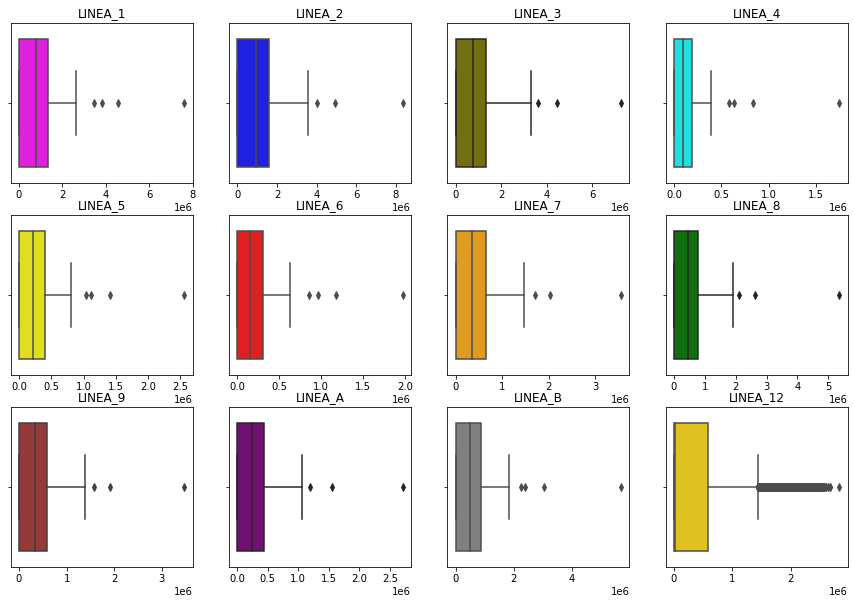

In [34]:
# Creamos un boxplot de los ingresos por cada linea dle metro
plt.figure(figsize = (15,10))
for i, linea in enumerate(lineas): 
    plt.subplot(3,4,i+1)
    sns.boxplot(x = linea, data = df, color = color[i])
    plt.title(linea)
    plt.xlabel('')

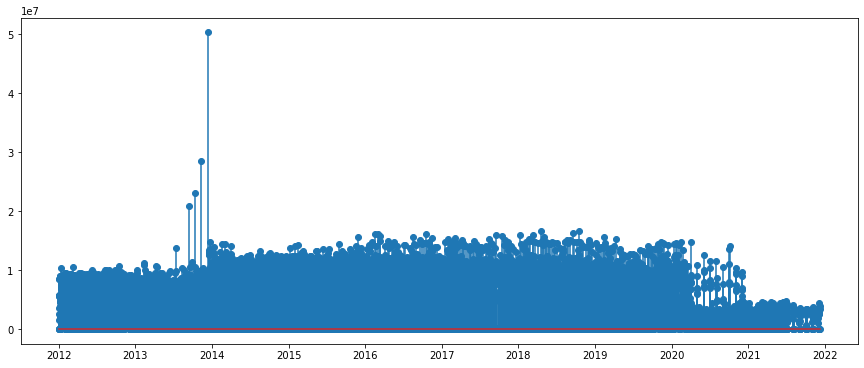

In [35]:
plt.figure(figsize = (15,6))
plt.stem(df['FECHA'], df['TOTAL_LINEAS'], markerfmt = 'o', linefmt = '-')
plt.show()

### Unir los ingresos diarios en otro dataframe por linea del metro (Boleto, Recaga, Tarjeta en columna TOTAL)

In [36]:
df.head()

,FECHA,TIPO_INGRESO,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12,AÑO,MES,DIA,DIA_SEMANA,TOTAL_LINEAS
0,2012-01-01,Boletos,648825.0,657120.0,466803.0,60120.0,242280.0,138525.0,138690.0,328383.0,176400.0,275370.0,472665.0,0.0,2012,1,1,6,3605181.0
1,2012-02-01,Boletos,1532940.0,1491780.0,1168590.0,165690.0,437025.0,286620.0,433323.0,777951.0,504600.0,514455.0,965385.0,0.0,2012,2,1,2,8278359.0
2,2012-03-01,Boletos,1398639.0,1482255.0,1143675.0,162360.0,388575.0,268770.0,432117.0,758661.0,503595.0,489090.0,887790.0,0.0,2012,3,1,3,7915527.0
3,2012-04-01,Boletos,1414041.0,1556265.0,1181085.0,171360.0,392190.0,270795.0,443070.0,799875.0,505575.0,521760.0,964290.0,0.0,2012,4,1,6,8220306.0
4,2012-05-01,Boletos,1407075.0,1593750.0,1200975.0,178830.0,384465.0,269055.0,447345.0,823911.0,515835.0,509055.0,988845.0,0.0,2012,5,1,1,8319141.0


In [37]:
# Se eliminarán las fechas repetidas y se almacenaran en una lista, posterormente se sumaran todos lods valores que
# tengan la misma fecha en el dataset por linea y el total 

#  Fechas sin repetición 
fechas = sorted(set(df['FECHA']))

# Lista donde se almacenarán los totales
totales = []

for fecha in fechas:
    sub_df = df.loc[df['FECHA'] == fecha]
    totales.append(sum(sub_df['TOTAL_LINEAS']))

In [41]:
print(len(fechas))
print(len(totales))

3469
3469


### Implementación de facebook prophet

In [52]:
# Creación del dataset con las características necesarias
data = pd.DataFrame({'ds': fechas, 'y': totales})
data

,ds,y
0,2012-01-01,3605181.0
1,2012-01-02,14075094.0
2,2012-01-03,14199672.7
3,2012-01-04,7195496.5
4,2012-01-05,8251512.0
...,...,...
3464,2021-12-02,5666242.0
3465,2021-12-03,6829546.0
3466,2021-12-04,7532695.0
3467,2021-12-05,5558278.0


In [53]:
# Importamnos las librerias del modelo
from fbprophet import Prophet

In [175]:
# Se crea el modelo
# Cambiamos el parametro changepoint_prior_scale para que no sea tan flexible
model = Prophet(changepoint_prior_scale = 0.001)
# Entrenamos el modelo
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [176]:
# Creamos fechas hasta un año posterior
feature = model.make_future_dataframe(periods = 365)

In [177]:
# Predecimos para esa fecha
forecast = model.predict(feature)

In [178]:
# ds es la fecha a predecir
# yhat el valor de venta que predice el modelo
# yhat_lower el valor minimo que predice el modelo
# yhat_upper el valor maximo que predice el modelo
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2012-01-01,8.801398e+06,2.933611e+06,1.449261e+07
1,2012-01-02,1.462292e+07,8.668856e+06,2.023535e+07
2,2012-01-03,1.328430e+07,7.659433e+06,1.895496e+07
3,2012-01-04,1.279743e+07,6.981078e+06,1.843408e+07
4,2012-01-05,1.311725e+07,6.849378e+06,1.876327e+07


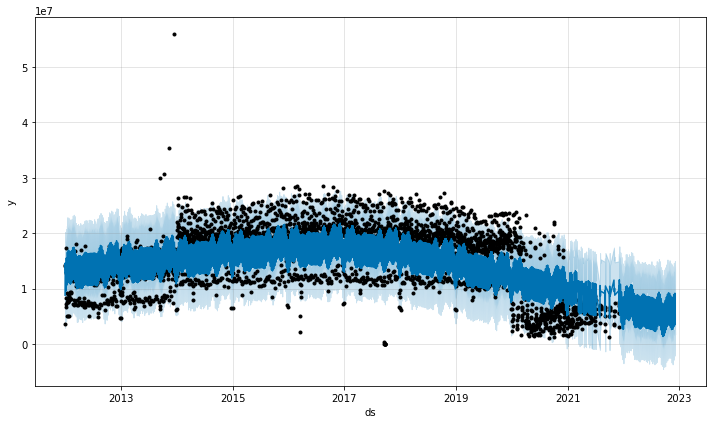

In [179]:
fig1 = model.plot(forecast)

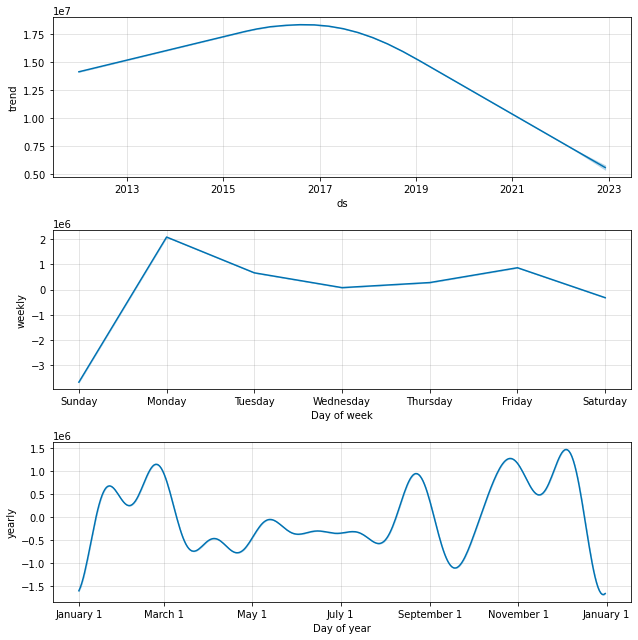

In [180]:
fig2 = model.plot_components(forecast)

- Hay un error en el modelo, pues el creé que la tendencía irá hacia abajo por la gran cantidad de perdidas que ha tenido el metro desde la pandemia
- Como mencionamos anteriormente el día de la semana en donde hay más ingresos es en lunes y el menor en domingo
- Con respecto a los años, Diciembre es el pico de más ingresos junto con los finales de octubre

In [173]:
# Para agregar el valor más pequeño es agregando la columna 'floor' y el valor más alto la columna 'cap' a el df 
# de entrenamiento como al future
# data['floor'] = 8265
# data['cap'] = 14824610 
# Si hubieramos agregado las DOS columnas Floor y cap tdenrías que agregar a nuestro modelo Prophet(growth = 'logistic')

In [174]:
# https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html
# https://datos.cdmx.gob.mx/